In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('Data/train.csv')

In [3]:
df_test = pd.read_csv('Data/test.csv')

In [4]:
x = df_train.drop('label', axis=1)
test = df_test

y = df_train.label

In [5]:
x = x / 255.0

test = test / 255.0

In [6]:
x = x.values.reshape(-1, 28, 28, 1)

test = test.values.reshape(-1, 28, 28, 1)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [9]:
x_train.shape

(31500, 28, 28, 1)

In [10]:
len(y_train)

31500

In [11]:
x_test.shape

(10500, 28, 28, 1)

In [12]:
len(y_test)

10500

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='label', ylabel='count'>

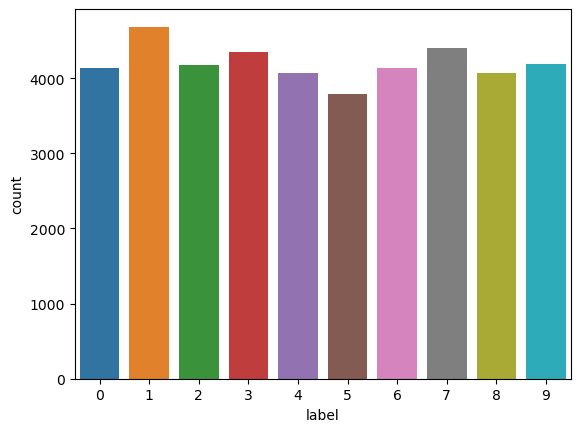

In [14]:
sns.countplot(x='label', data=df_train)

In [15]:
!pip install tensorflow

In [16]:
import tensorflow as tf

In [17]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
                             tf.keras.layers.MaxPooling2D((2, 2)), 
                             tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), 
                             tf.keras.layers.MaxPooling2D((2, 2)), 
                             tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), 
                             
                             tf.keras.layers.Flatten(input_shape=(28, 28)), 
                             tf.keras.layers.Dense(128, activation='relu'), 
                             tf.keras.layers.Dense(10)])

In [18]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
985/985 [==============================] - 18s 18ms/step - loss: 0.1990 - accuracy: 0.9376
Epoch 2/10
985/985 [==============================] - 19s 19ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 3/10
985/985 [==============================] - 16s 16ms/step - loss: 0.0421 - accuracy: 0.9868
Epoch 4/10
985/985 [==============================] - 15s 15ms/step - loss: 0.0339 - accuracy: 0.9892
Epoch 5/10
985/985 [==============================] - 15s 15ms/step - loss: 0.0270 - accuracy: 0.9911
Epoch 6/10
985/985 [==============================] - 15s 15ms/step - loss: 0.0193 - accuracy: 0.9935
Epoch 7/10
985/985 [==============================] - 14s 15ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 8/10
985/985 [==============================] - 15s 15ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 9/10
985/985 [==============================] - 15s 15ms/step - loss: 0.0127 - accuracy: 0.9956
Epoch 10/10
985/985 [==============================] - 15s 15ms/step - loss: 0.012

In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test)

875/875 [==============================] - 6s 7ms/step


In [22]:
test.shape

(28000, 28, 28, 1)

In [23]:
predictions = np.argmax(predictions, axis=1)

predictions_df = pd.Series(predictions, name='Label')
predictions_label = pd.Series(range(1, 28001), name='ImageId')

submission = pd.concat([predictions_label, predictions_df], axis=1)

In [24]:
submission.to_csv('submission.csv', index=False)